# Tratamento dos dados

In [42]:
#Importo as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
#Defino variáveis para as tabelas que serão analisadas
df = pd.read_excel ('STG_MVT_CRD.xlsx')
cf = pd.read_excel ('STG_MDL.xlsx')

In [44]:
#Verifico os tipos dos dados inseridos
df.dtypes

ID_STG_MVT_CRD           int64
VLR_SDO_UTZ_CRD_RTO    float64
VLR_TOT_FAT            float64
VLR_MIM_FAT            float64
VLR_PCL_FAT            float64
QTD_CLI_CAD_POS          int64
QTD_MVT                  int64
DES_TIP_PSS             object
ID_FNT_ITT               int64
COD_MDL                 object
DAT_RSS_FNT_ITT         object
DAT_INC_DBO             object
dtype: object

In [45]:
#Converto todos os valores para acrescentar dois decimais
for c in df.VLR_PCL_FAT:
    d = c * 0.01
    print (d)
    df.VLR_PCL_FAT = df.VLR_PCL_FAT.replace(c, d)

for c in df.VLR_TOT_FAT:
    d = c * 0.01
    print (d)
    df.VLR_TOT_FAT = df.VLR_TOT_FAT.replace(c, d)
    
for c in df.VLR_MIM_FAT:
    d = c * 0.01
    print (d)
    df.VLR_MIM_FAT = df.VLR_MIM_FAT.replace(c, d)

for c in df.VLR_SDO_UTZ_CRD_RTO:
    d = c * 0.01
    print (d)
    df.VLR_SDO_UTZ_CRD_RTO = df.VLR_SDO_UTZ_CRD_RTO.replace(c, d)

459551683.82
738723734.09
28681807.59
611125080.38
21526.09
4607336.62
2638330685.39
1838029024.97
9738712.71
nan
94967215.47
3556795492.4900002
18344465.14
1733950.32
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
19327671919.78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
6071737936.6
nan
nan
nan
nan
nan
nan
nan
nan
nan
218175760.02
nan
nan
nan
nan
nan


In [46]:
#Apenas uma visualização dos valores formato moeda
cd = df.VLR_PCL_FAT.map('R$ {:>20,.2f}'.format)
print (cd)

cd = df.VLR_TOT_FAT.map('R$ {:>20,.2f}'.format)
print (cd)

cd = df.VLR_MIM_FAT.map('R$ {:>20,.2f}'.format)
print (cd)

cd = df.VLR_SDO_UTZ_CRD_RTO.map('R$ {:>20,.2f}'.format)
print (cd)

0     R$       459,551,683.82
1     R$       738,723,734.09
2     R$        28,681,807.59
3     R$       611,125,080.38
4     R$            21,526.09
5     R$         4,607,336.62
6     R$     2,638,330,685.39
7     R$     1,838,029,024.97
8     R$         9,738,712.71
9     R$                  nan
10    R$        94,967,215.47
11    R$     3,556,795,492.49
12    R$        18,344,465.14
13    R$         1,733,950.32
14    R$                  nan
Name: VLR_PCL_FAT, dtype: object
0     R$                  nan
1     R$                  nan
2     R$                  nan
3     R$                  nan
4     R$                  nan
5     R$                  nan
6     R$                  nan
7     R$                  nan
8     R$                  nan
9     R$                  nan
10    R$                  nan
11    R$                  nan
12    R$                  nan
13    R$                  nan
14    R$    19,327,671,919.78
Name: VLR_TOT_FAT, dtype: object
0     R$                  nan
1   

In [47]:
#Verifico os tipos dos dados inseridos
df.dtypes

ID_STG_MVT_CRD           int64
VLR_SDO_UTZ_CRD_RTO    float64
VLR_TOT_FAT            float64
VLR_MIM_FAT            float64
VLR_PCL_FAT            float64
QTD_CLI_CAD_POS          int64
QTD_MVT                  int64
DES_TIP_PSS             object
ID_FNT_ITT               int64
COD_MDL                 object
DAT_RSS_FNT_ITT         object
DAT_INC_DBO             object
dtype: object

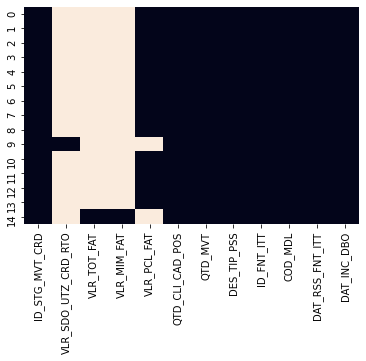

In [48]:
#Crio um mapa para visualizar as células vazias da tabela
sns.heatmap(df.isnull(), cbar=False)

In [49]:
#Solução para preencher as celulas vazias com 0
#df = df.replace(np.nan, 0)

# Analisando a qualidade dos dados após o tratamento

In [50]:
#Defino as variáveis excluindo as modalidades que não fazem parte da categoria
nocredcard = df[df.COD_MDL != 'D01'] #Desprezo a linha do Cartão de Crédito
nocredcard = nocredcard[nocredcard.COD_MDL != 'E01'] #Desprezo a linha do Cheque Especial
rotativo = df[df.COD_MDL == 'E01'] #Analiso apenas a linha do Cheque Especial
cred = df[df.COD_MDL == 'D01'] #Analiso apenas a linha do Cartão de Crédito

#Crio uma nova tabela
datareview = pd.DataFrame({'naonulo': [nocredcard.VLR_PCL_FAT.notna().mean().round(4) * 100, cred.VLR_MIM_FAT.notna().mean().round(4) * 100, cred.VLR_TOT_FAT.notna().mean().round(4) * 100, df.QTD_CLI_CAD_POS.notna().mean().round(4) * 100, df.QTD_MVT.notna().mean().round(4) * 100, rotativo.QTD_MVT.notna().mean().round(4) * 100],
                      'nulo': [nocredcard.VLR_PCL_FAT.isna().mean().round(4) * 100, cred.VLR_MIM_FAT.isna().mean().round(4) * 100, cred.VLR_TOT_FAT.isna().mean().round(4) * 100, df.QTD_CLI_CAD_POS.isna().mean().round(4) * 100, df.QTD_MVT.isna().mean().round(4) * 100, rotativo.QTD_MVT.isna().mean().round(4) * 100]},
                     index=['Valor Parcela', 'Valor Mínimo da Fatura do Cartão de Crédito', 'Valor Total da Fatura do Cartão de Crédito', 'Quantidade de Clientes', 'Quantidade de Movimentações', 'Saldo Devedor do Cheque Especial'])
datareview

,naonulo,nulo
Valor Parcela,100.0,0.0
Valor Mínimo da Fatura do Cartão de Crédito,100.0,0.0
Valor Total da Fatura do Cartão de Crédito,100.0,0.0
Quantidade de Clientes,100.0,0.0
Quantidade de Movimentações,100.0,0.0
Saldo Devedor do Cheque Especial,100.0,0.0


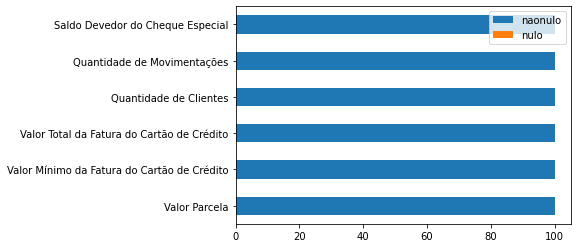

In [52]:
#Ploto o resultado em formato gráfico
datareview.plot(kind="barh", stacked=True)

# Analisando o valor das parcelas por modalidade

In [53]:
#Troco os códigos das modalidades por seus nomes correspondentes

#Imprimo a lista de cada uma das tabelas para visualização dos ids correspondentes
print (df.COD_MDL, cf.COD_MDL)

#Armazeno os nomes em uma lista vazia
g = []
for i in cf.DES_MDL:
    print (i)
    g.append (i)

#Troco os código da tabela MVT pelos nomes correspondentes armazenados na lista anterior
for c in range (len(df.COD_MDL)):
    for i in range (len(cf.COD_MDL)):
        if cf.COD_MDL[i] == df.COD_MDL[c]:
            d = g[i]
            print (c, i, d)
            df.COD_MDL[c] = df.COD_MDL[c].replace(df.COD_MDL[c], g[i])

#Verifico o resultado
df.COD_MDL

0     C01
1     B99
2     B01
3     B03
4     F01
5     B07
6     A04
7     B05
8     A05
9     E01
10    G01
11    A01
12    A99
13    B06
14    D01
Name: COD_MDL, dtype: object 0     E02
1     B99
2     D01
3     G01
4     A02
5     A04
6     E01
7     B03
8     B02
9     A05
10    B04
11    B07
12    F01
13    B06
14    C01
15    A01
16    B05
17    A99
18    B01
Name: COD_MDL, dtype: object
ADIANTAMENTO DEPOSITANTE
OUTROS FINANCIAMENTOS
CARTAO DE CREDITO
TITULOS DESCONTADOS
EMPRESTIMO - CAPITAL DE GIRO
EMPRESTIMO - CREDITO PESSOAL
CHEQUE ESPECIAL E CONTA GARANTIDA
FINANCIAMENTO - IMOBILIARIOS SFH
FINANCIAMENTO - IMPORTACAO  E EXPORTACAO
EMPRESTIMO - MICROCREDITO
FINANCIAMENTO - MICROCREDITO
FINANCIAMENTO - ARREENDAMENTO
AVAIS E FIANCASA HONRADOS
FINANCIAMENTO - IMOBILIARIO (OUTROS)
CONSORCIO
EMPRESTIMO - CONSIGNADO
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
OUTROS EMPRESTIMOS
FINANCIAMENTO - RURAL E AGROINDUSTRIAL
0 14 CONSORCIO
1 1 OUTROS FINANCIAMENTOS
2 18 FINANCIAMENTO - RURA

c:\users\chatillon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0                                        CONSORCIO
1                            OUTROS FINANCIAMENTOS
2           FINANCIAMENTO - RURAL E AGROINDUSTRIAL
3                 FINANCIAMENTO - IMOBILIARIOS SFH
4                        AVAIS E FIANCASA HONRADOS
5                    FINANCIAMENTO - ARREENDAMENTO
6                     EMPRESTIMO - CREDITO PESSOAL
7     FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
8                        EMPRESTIMO - MICROCREDITO
9                CHEQUE ESPECIAL E CONTA GARANTIDA
10                             TITULOS DESCONTADOS
11                         EMPRESTIMO - CONSIGNADO
12                              OUTROS EMPRESTIMOS
13            FINANCIAMENTO - IMOBILIARIO (OUTROS)
14                               CARTAO DE CREDITO
Name: COD_MDL, dtype: object

In [54]:
#Crio uma nova tabela para analisar apenas os valores das parcelas
parcela = df[['COD_MDL', 'VLR_PCL_FAT']].groupby(['COD_MDL']).max().dropna()
parcela

,VLR_PCL_FAT
COD_MDL,
AVAIS E FIANCASA HONRADOS,2.152609e+04
CONSORCIO,4.595517e+08
EMPRESTIMO - CONSIGNADO,3.556795e+09
EMPRESTIMO - CREDITO PESSOAL,2.638331e+09
EMPRESTIMO - MICROCREDITO,9.738713e+06
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),1.838029e+09
FINANCIAMENTO - ARREENDAMENTO,4.607337e+06
FINANCIAMENTO - IMOBILIARIO (OUTROS),1.733950e+06
FINANCIAMENTO - IMOBILIARIOS SFH,6.111251e+08


Text(0.5, 1.0, 'Valor das parcelas por modalidade')

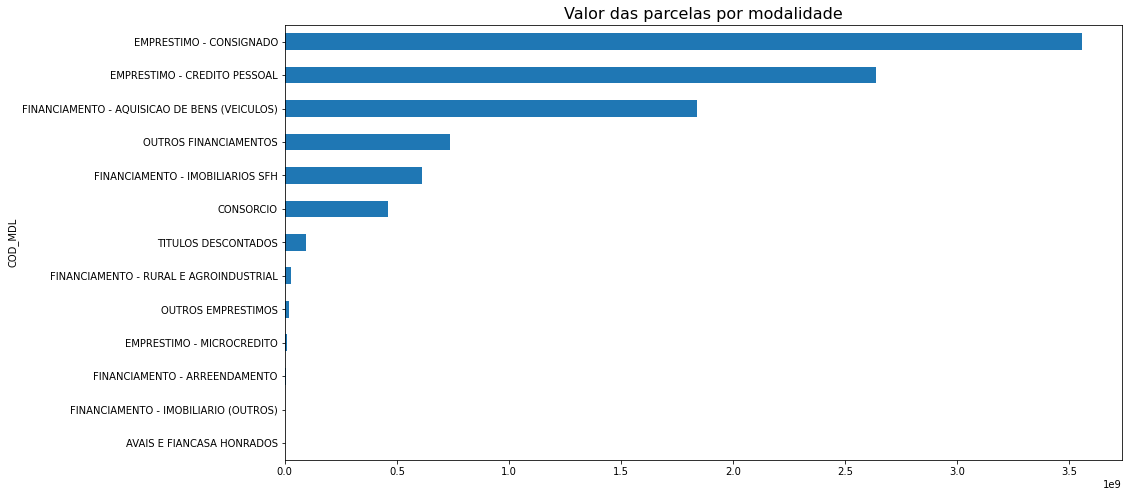

In [55]:
#Ploto o resultado em formato gráfico
parcela = parcela.VLR_PCL_FAT.sort_values()
parcela.plot(kind='barh', figsize = (15,8));
plt.title('Valor das parcelas por modalidade', fontsize=16)

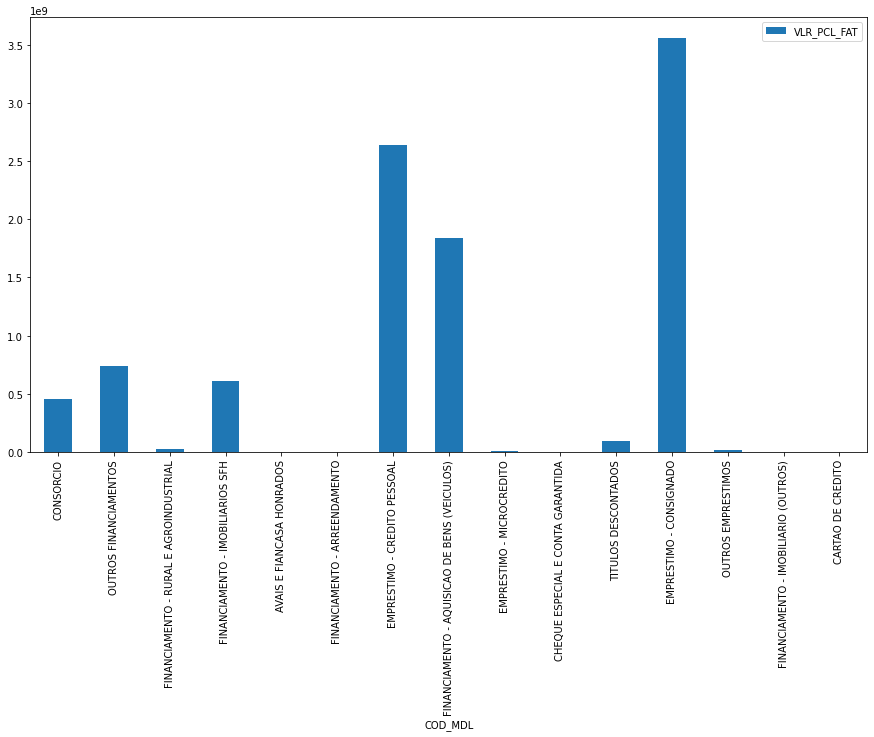

In [56]:
#Outra forma de plotar graficamente
parcela = df.plot(kind='bar',x='COD_MDL', y='VLR_PCL_FAT', figsize = (15,8));

# Analisando o número de clientes por Modalidade

In [57]:
#Crio uma nova tabela para analisar apenas os número de clientes
cliente = df[['COD_MDL', 'QTD_CLI_CAD_POS']].groupby(['COD_MDL']).max().dropna()
cliente

,QTD_CLI_CAD_POS
COD_MDL,
AVAIS E FIANCASA HONRADOS,2
CARTAO DE CREDITO,1840240
CHEQUE ESPECIAL E CONTA GARANTIDA,194378
CONSORCIO,37186
EMPRESTIMO - CONSIGNADO,494442
EMPRESTIMO - CREDITO PESSOAL,721836
EMPRESTIMO - MICROCREDITO,5061
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),135773
FINANCIAMENTO - ARREENDAMENTO,33


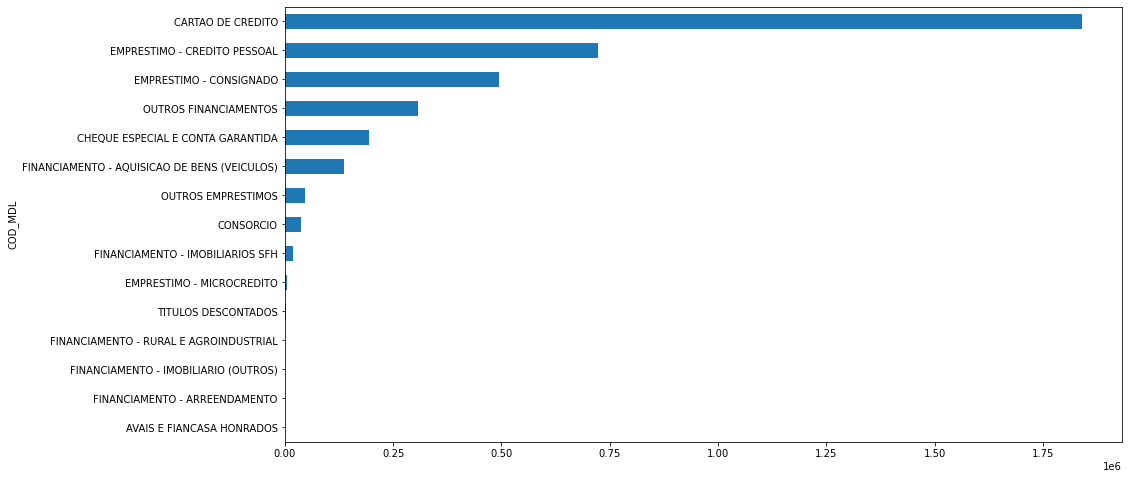

In [58]:
#Ploto o resultado em formato gráfico
cliente = cliente.QTD_CLI_CAD_POS.sort_values()
cliente.plot(kind='barh', figsize = (15,8));

# Analisando o número de movimentações por modalidade

In [59]:
#Crio uma nova tabela para analisar apenas os número de movimentações
movimentacao = df[['COD_MDL', 'QTD_MVT']].groupby(['COD_MDL']).max().dropna()
movimentacao

,QTD_MVT
COD_MDL,
AVAIS E FIANCASA HONRADOS,4
CARTAO DE CREDITO,21748501
CHEQUE ESPECIAL E CONTA GARANTIDA,194921
CONSORCIO,677272
EMPRESTIMO - CONSIGNADO,19241809
EMPRESTIMO - CREDITO PESSOAL,10020532
EMPRESTIMO - MICROCREDITO,38003
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS),1797516
FINANCIAMENTO - ARREENDAMENTO,329


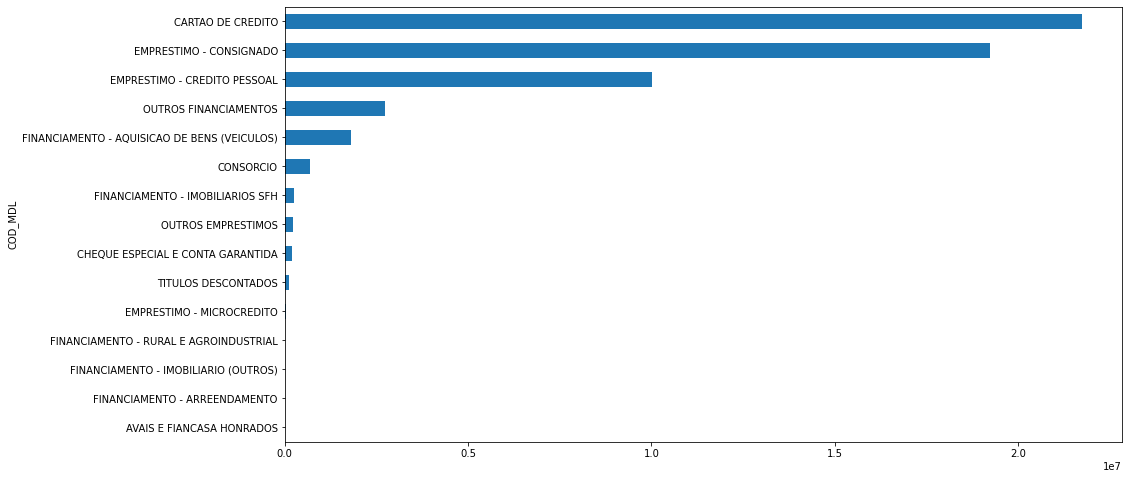

In [60]:
#Ploto o resultado em formato gráfico
movimentacao = movimentacao.QTD_MVT.sort_values()
movimentacao.plot(kind='barh', figsize = (15,8));

# Analisando as faturas do cartão de crédito

In [61]:
#Crio uma nova tabela para analisar apenas as faturas do cartão de crédito
credito = df.query('COD_MDL == "CARTAO DE CREDITO"')
credito = credito[['COD_MDL', 'VLR_TOT_FAT', 'VLR_MIM_FAT']].groupby(['COD_MDL']).max().dropna()
credito

,VLR_TOT_FAT,VLR_MIM_FAT
COD_MDL,,
CARTAO DE CREDITO,1.932767e+10,6.071738e+09


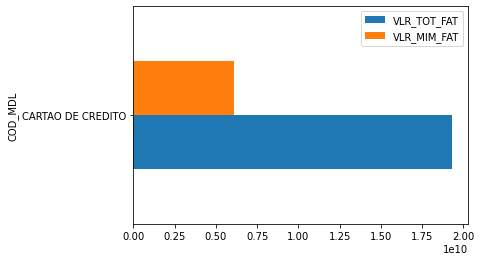

In [62]:
#Ploto o resultado em formato gráfico
credito = df.query('COD_MDL == "CARTAO DE CREDITO"')
credito[["COD_MDL", "VLR_TOT_FAT", "VLR_MIM_FAT"]].plot(x="COD_MDL", kind="barh")

# Analisando o saldo devedor do cheque especial

In [63]:
#Crio uma nova tabela para analisar apenas o saldo devedor do cheque especial
cheque = df.query('COD_MDL == "CHEQUE ESPECIAL E CONTA GARANTIDA"')
cheque = cheque[['COD_MDL', 'VLR_SDO_UTZ_CRD_RTO']].groupby(['COD_MDL']).max().dropna()
cheque

,VLR_SDO_UTZ_CRD_RTO
COD_MDL,
CHEQUE ESPECIAL E CONTA GARANTIDA,2.181758e+08


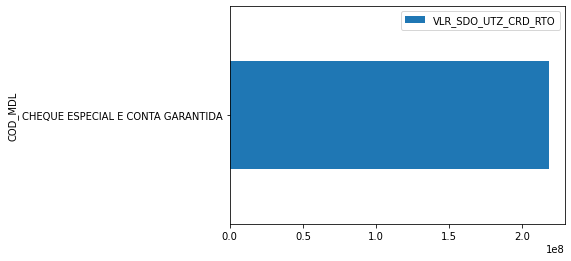

In [64]:
#Ploto o resultado em formato gráfico
cheque = df.query('COD_MDL == "CHEQUE ESPECIAL E CONTA GARANTIDA"')
cheque[["COD_MDL", "VLR_SDO_UTZ_CRD_RTO"]].plot(x="COD_MDL", kind="barh")

# Opcional: Exportando a tabela corrigida para XLSX

In [41]:
#df = df    
#df.to_excel('novo_STG_MVT.xlsx')